In [1]:
from keras.datasets import cifar10     #导入numpy以及cifar10模块
import numpy as np
np.random.seed(10)

/home/luhan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_img_train,y_label_train),(x_image_test,y_label_test) = cifar10.load_data()      #下载cifar10数据

170500096/170498071 [==============================] - 221s 1us/step


In [9]:
(x_image_train,y_label_train),(x_image_test,y_label_test) = cifar10.load_data()    #读取cifar10数据

In [10]:
print('train:',len(x_image_train))               #查看cifar10数据
print('test:',len(x_image_test))

train: 50000
test: 10000


In [11]:
x_image_train.shape                          #查看训练数据images的形状

(50000, 32, 32, 3)

In [12]:
x_image_train[0]                            #查看训练数据images第0项的内容

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [14]:
y_label_train.shape　　　　　　　　　　　　#查看训练数据label的形状

(50000, 1)

In [15]:
#定义label_dict字典
label_dict={0:'airplane',1:'automoble',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [26]:
import matplotlib.pyplot as plt                                       #创建plot_images_labels_prediction函数
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,i+1)
        ax.imshow (images[idx],cmap ='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

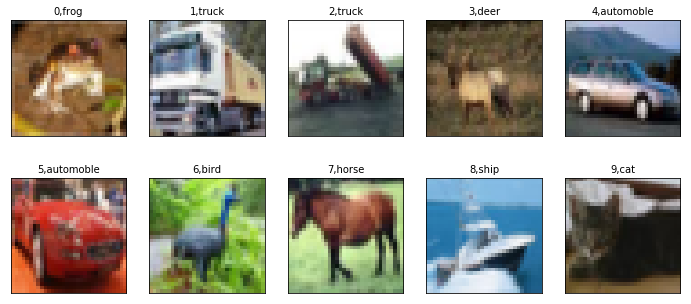

In [30]:
plot_images_labels_prediction(x_image_train,y_label_train,[],0,)       #显示训练数据前10项预测结果

In [28]:
x_image_train[0][0][0]         　　　　　#查看训练数据第1个图像的第1个点

array([59, 62, 63], dtype=uint8)

In [32]:
x_image_train_normalize = x_image_train.astype('float32')/255.0           #将数字图像标准化
x_image_test_normalize = x_image_test.astype('float32')/255.0

In [35]:
x_image_train_normalize[0][0][0]        #查看数字图像标准化后的数据

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [36]:
y_label_train[:5]　　　　　　　　　　　　　#显示训练数据前5项数据

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [39]:
from keras.utils import np_utils      #将数字图像真实值OneHot Ecoding转换
y_label_train_Onehot=np_utils.to_categorical(y_label_train)
y_label_test_Onehot=np_utils.to_categorical(y_label_test)

In [40]:
y_label_train_Onehot.shape          #查看OneHot Ecoding转换之后的label标签字段

(50000, 10)

In [41]:
y_label_train_Onehot[:5]           #查看OneHot Ecoding转换之后的结果

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)